In [242]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
adata=sc.read('Data/dataset.h5ad')

In [244]:
adata

AnnData object with n_obs × n_vars = 3273 × 30865
    obs: 'scan-b external id', 'instrument model', 'age at diagnosis', 'tumor size', 'lymph node group', 'lymph node status', 'er status', 'pgr status', 'her2 status', 'ki67 status', 'nhg', 'er prediction mgc', 'pgr prediction mgc', 'her2 prediction mgc', 'ki67 prediction mgc', 'nhg prediction mgc', 'er prediction sgc', 'pgr prediction sgc', 'her2 prediction sgc', 'ki67 prediction sgc', 'pam50 subtype', 'overall survival days', 'overall survival event', 'endocrine treated', 'chemo treated'

In [265]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key='instrument model')

In [266]:
sc.tl.pca(adata)

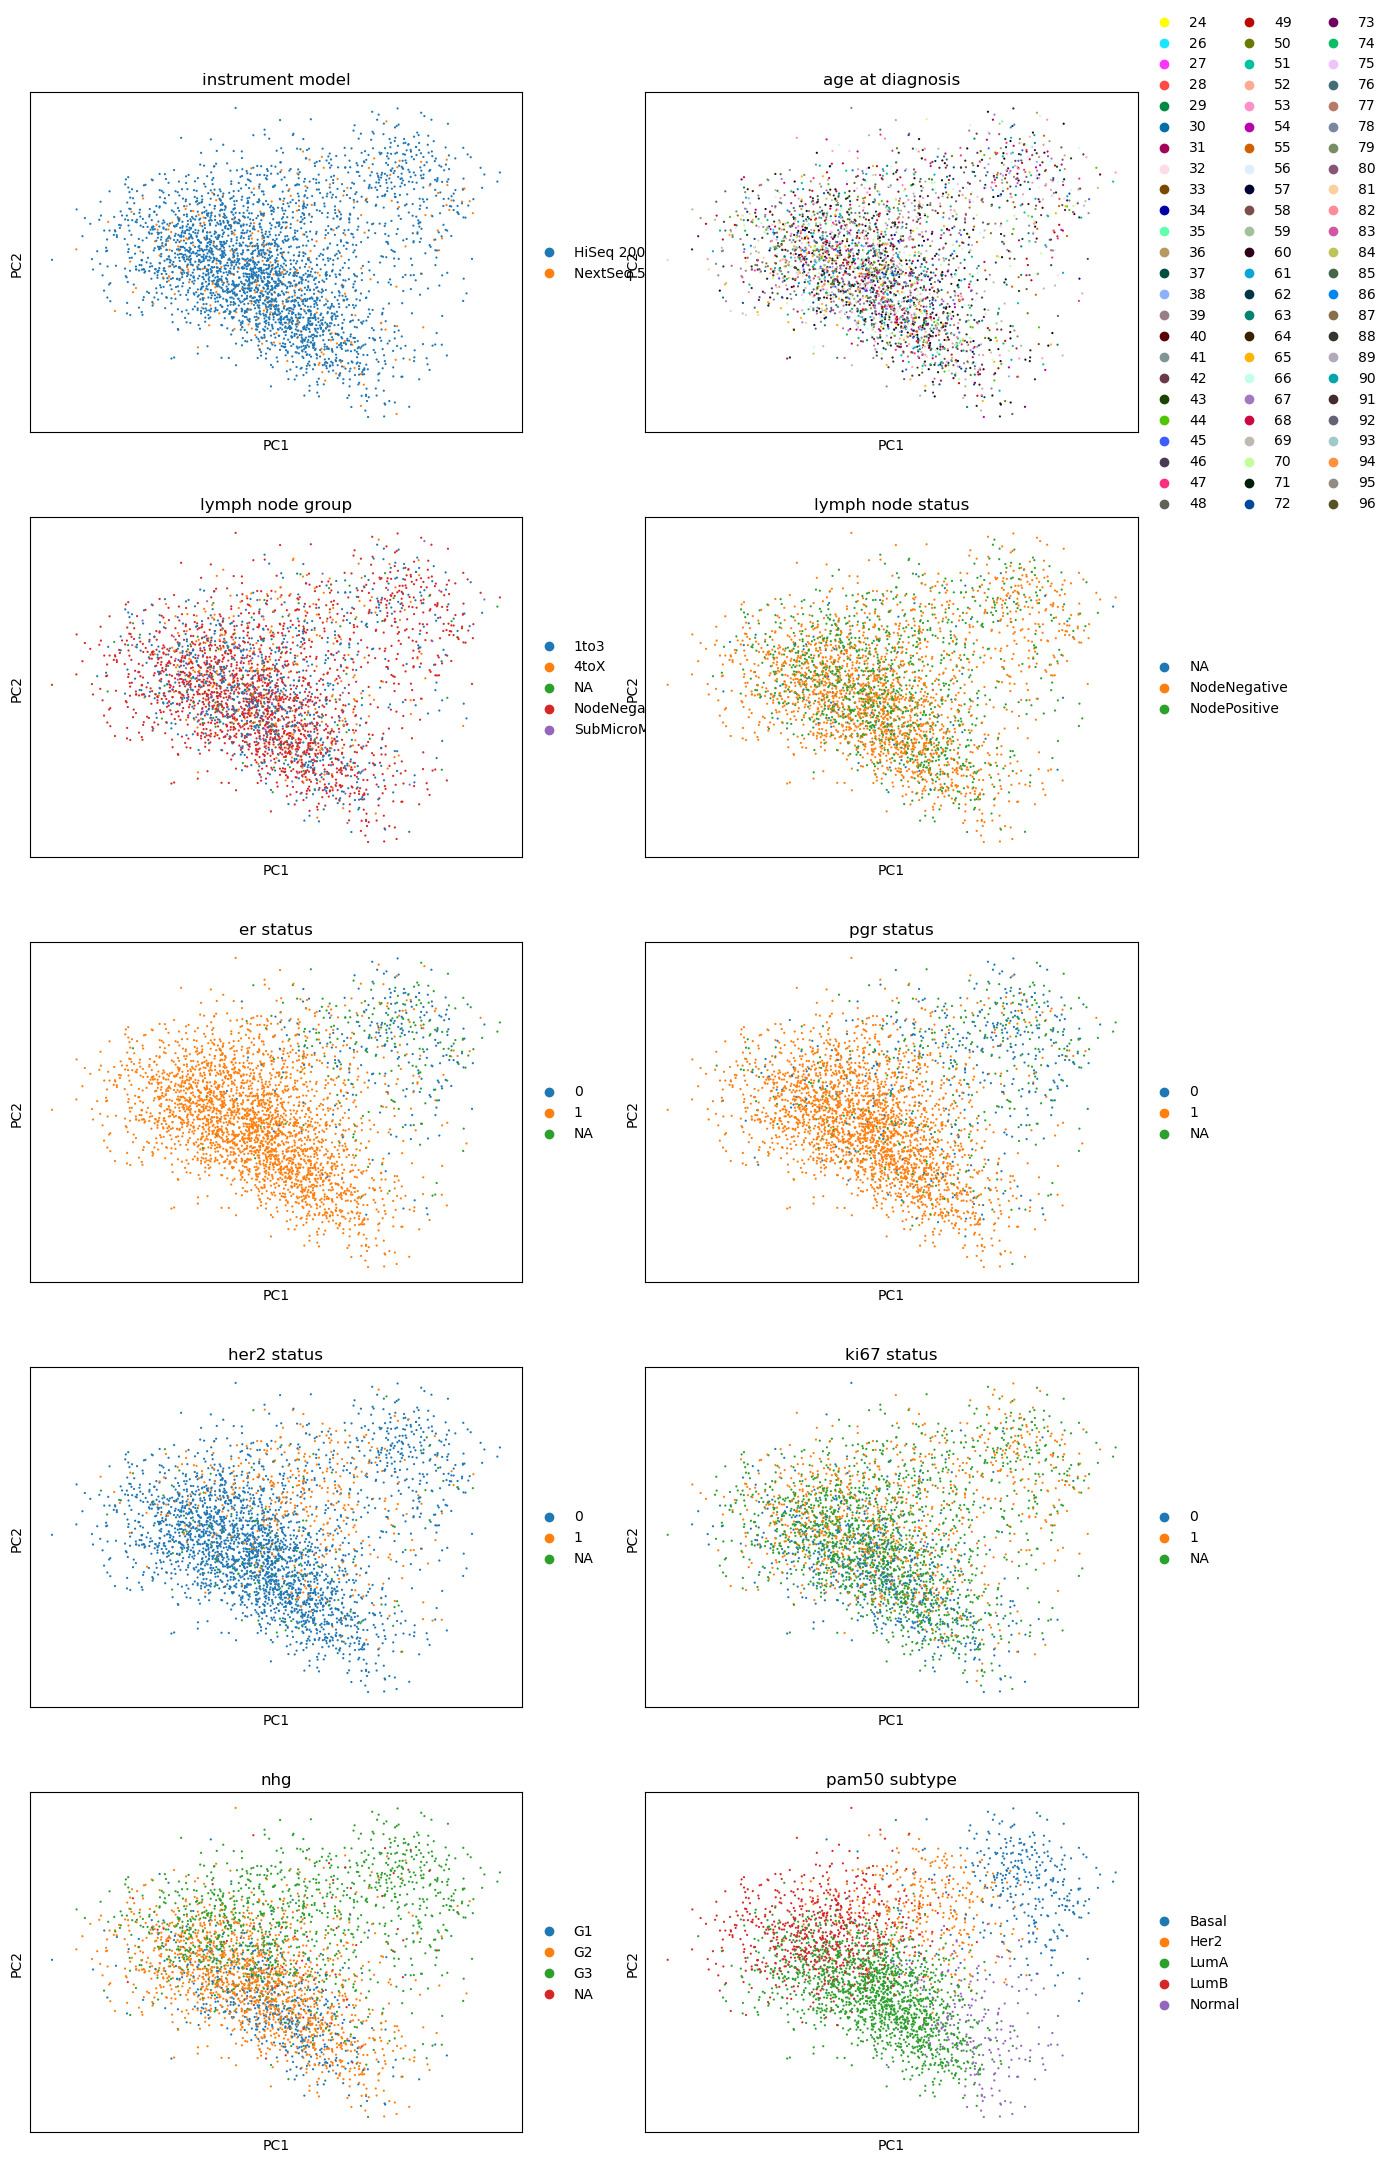

In [267]:
sc.pl.pca(
    adata,
    color=["instrument model", "age at diagnosis", "lymph node group", "lymph node status",'er status', 'pgr status', 'her2 status', 'ki67 status', 'nhg','pam50 subtype'],
    ncols=2,
    size=10,
)

In [268]:
sc.pp.neighbors(adata,n_neighbors=5)
sc.tl.umap(adata, min_dist=.1, spread=.5)

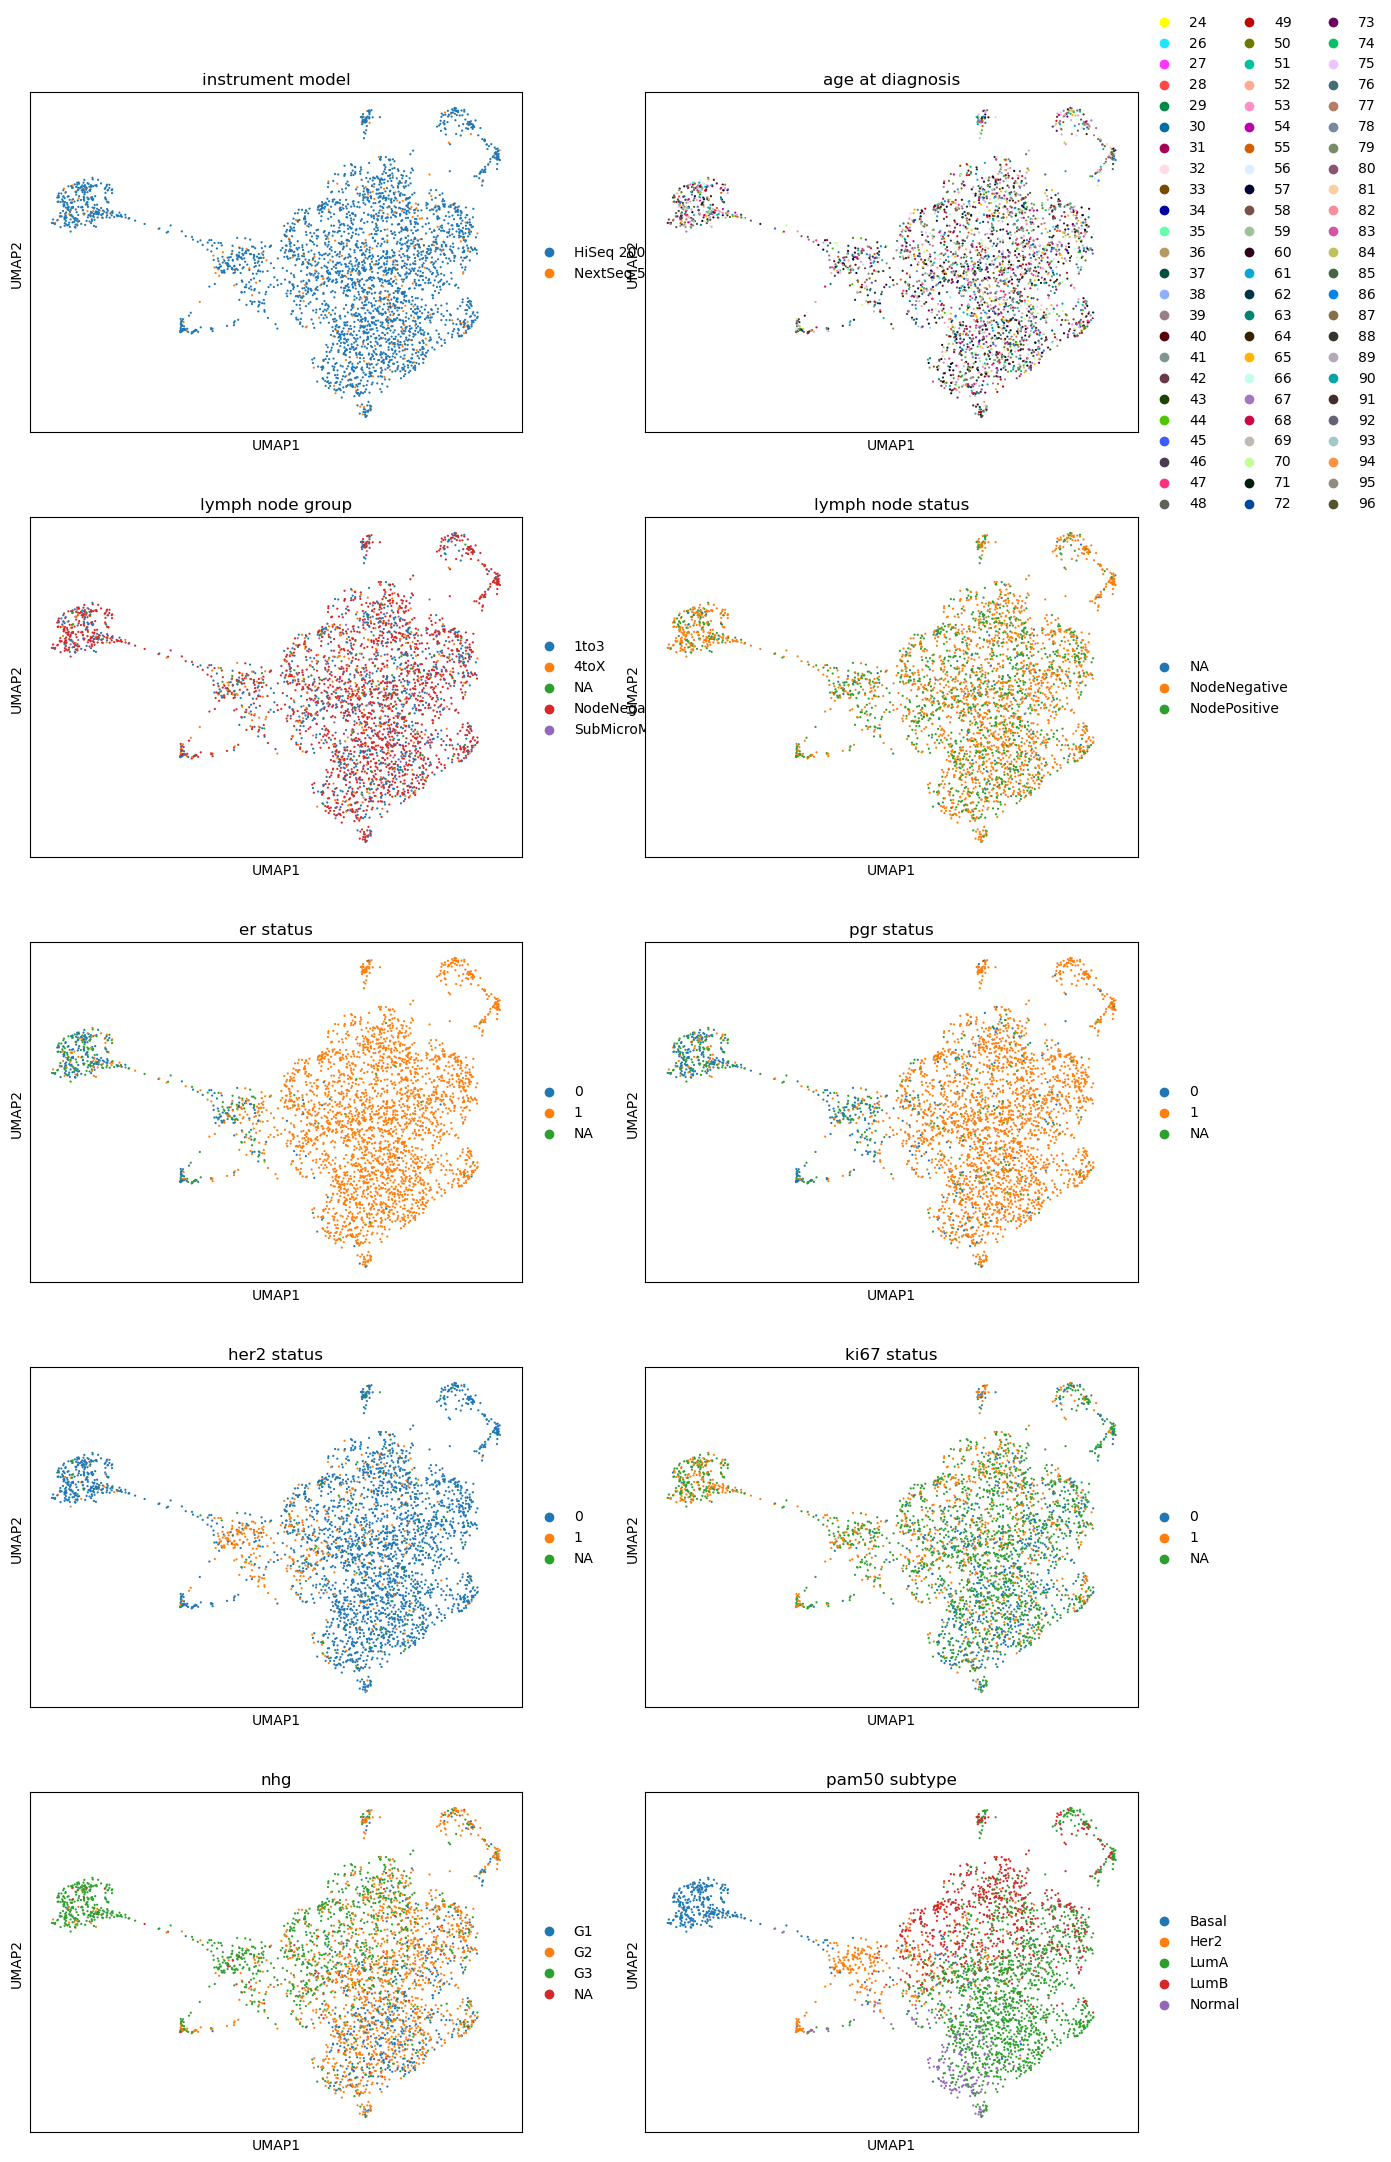

In [269]:
sc.pl.umap(
    adata,
    color=["instrument model", "age at diagnosis", "lymph node group", "lymph node status",'er status', 'pgr status', 'her2 status', 'ki67 status', 'nhg','pam50 subtype'],
    size=10,
    ncols=2
)

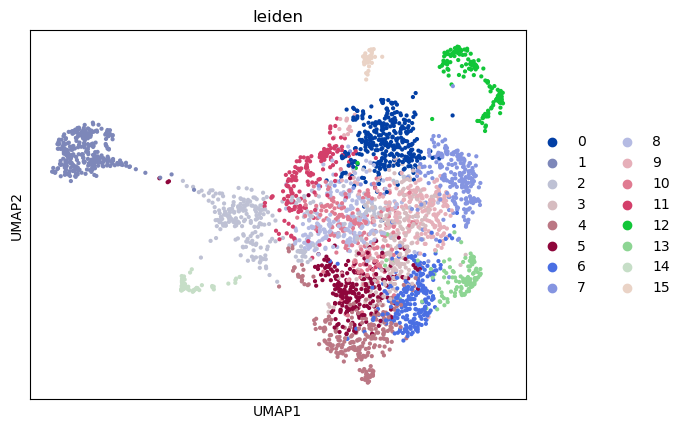

In [270]:
sc.tl.leiden(adata)
sc.pl.umap(adata, color=["leiden"])

In [271]:
def plot_categorical_var(variable):
    cluster_key = 'leiden'
    
    contingency = pd.crosstab(adata.obs[variable], adata.obs[cluster_key])

    
    # Optional: normalize by rows or columns
    normalized = contingency.T.div(contingency.sum(axis=0), axis=0)
    # Plot (stacked barplot)
    normalized.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.ylabel(f'Proportion of {variable}')
    plt.title(f'Distribution of {variable} across clusters')
    plt.legend(title=variable, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    sc.pl.umap(adata,color=[variable,cluster_key])

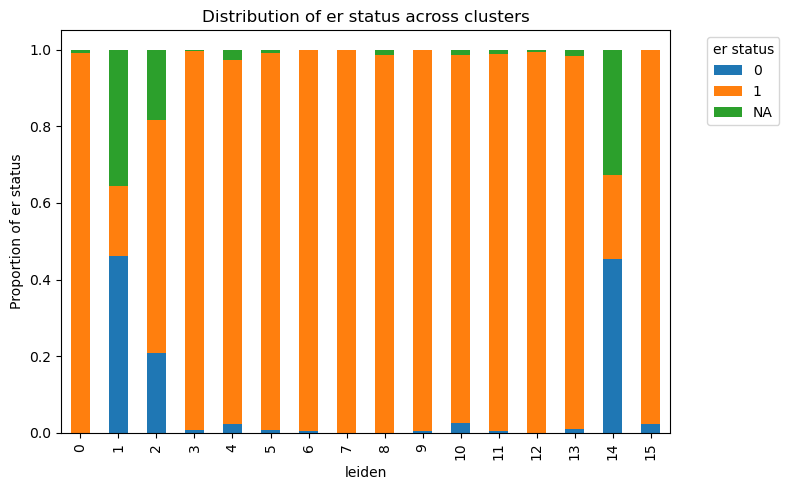

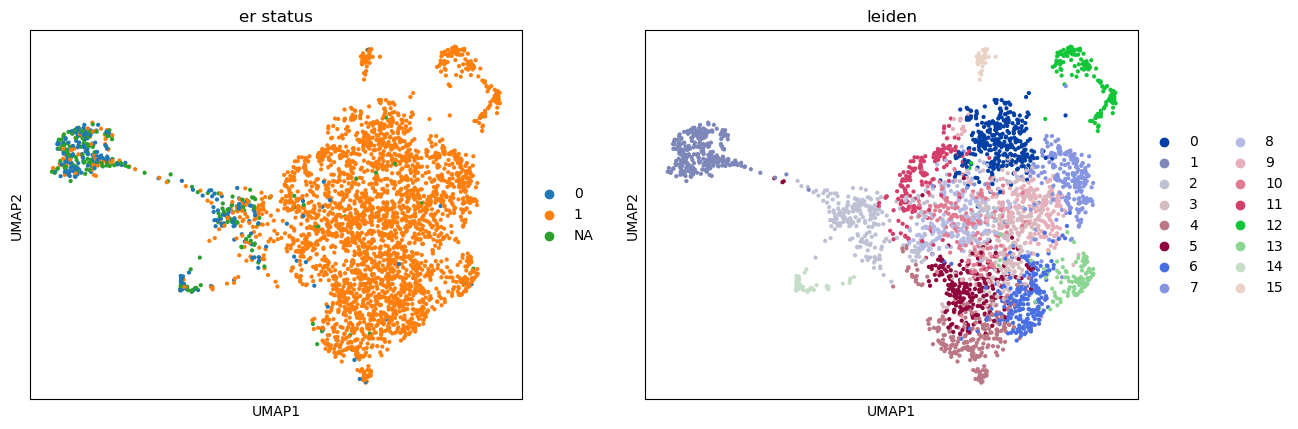

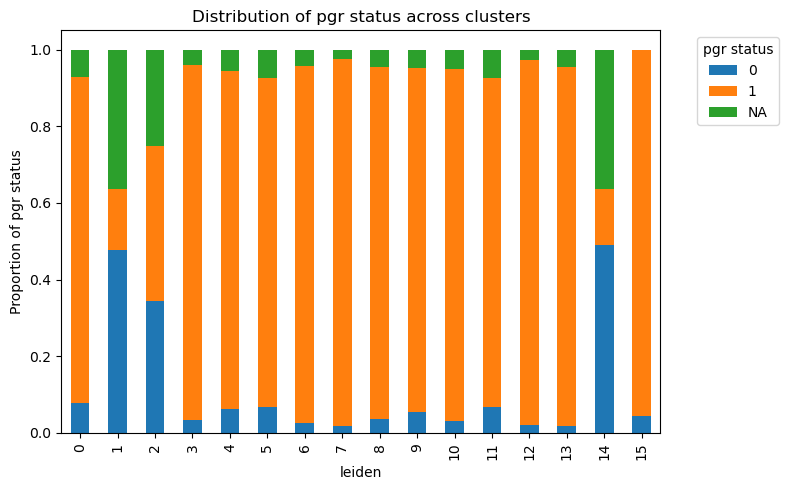

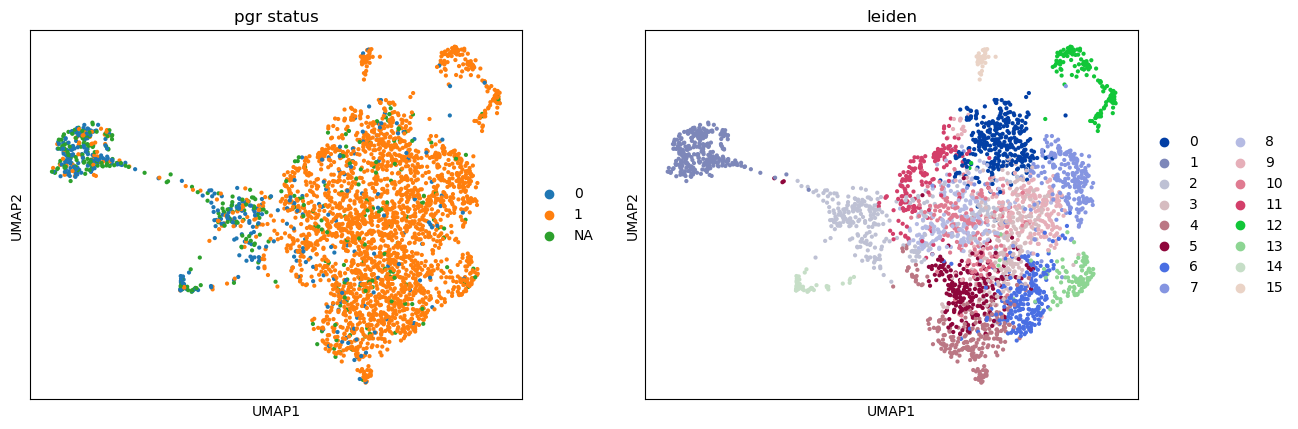

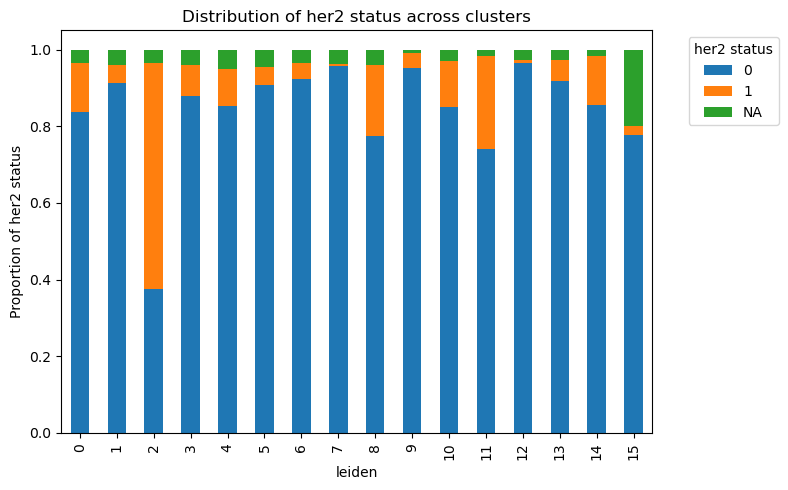

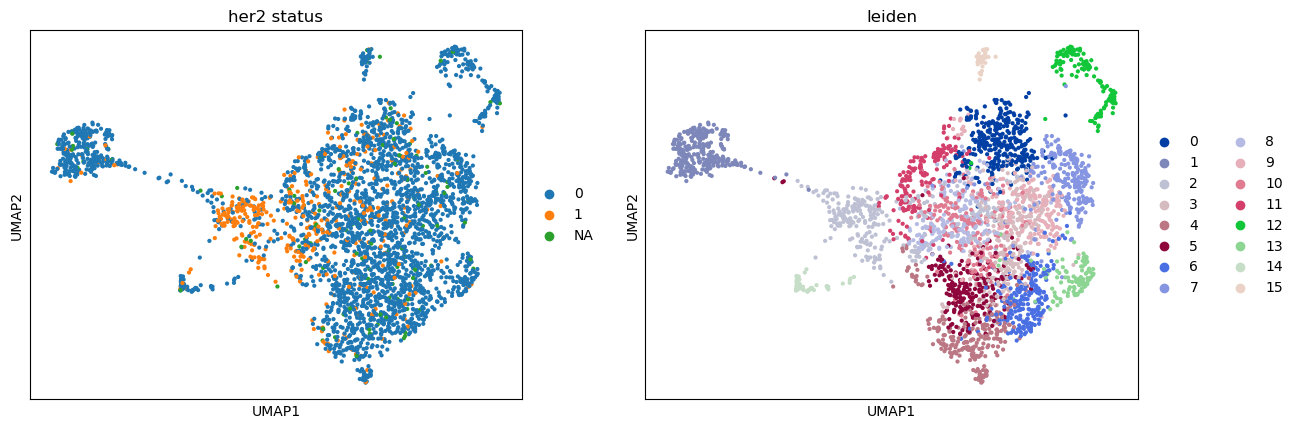

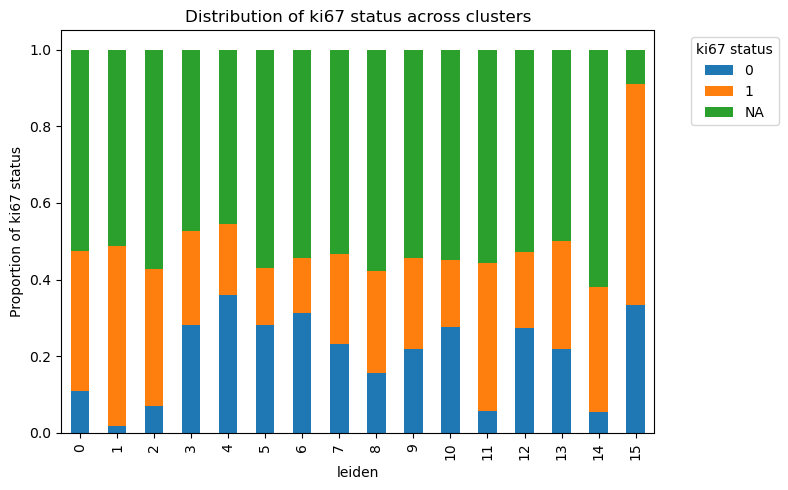

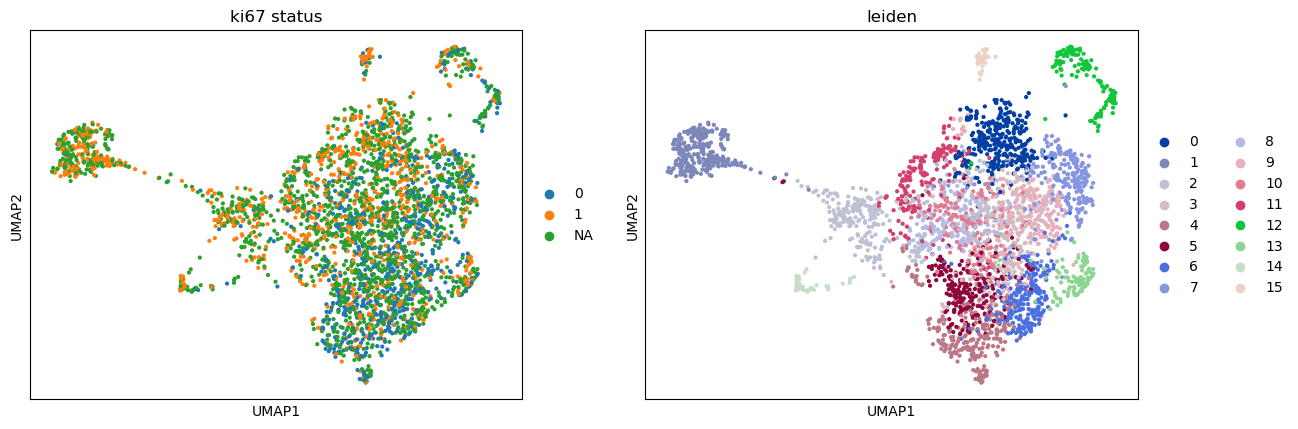

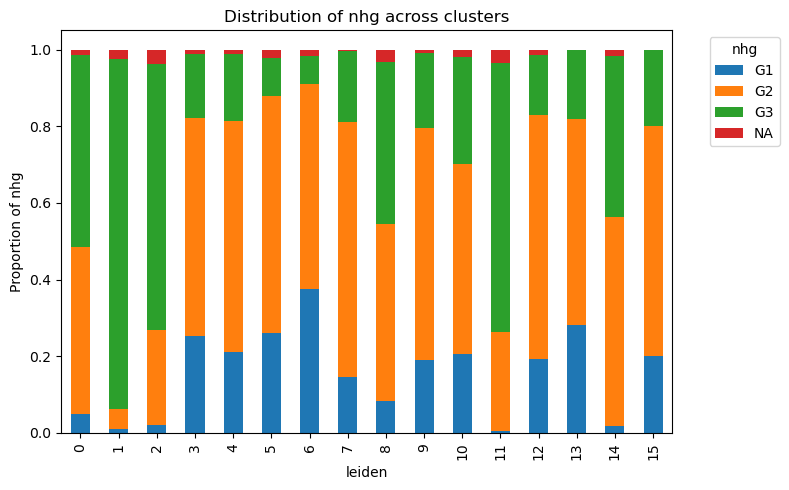

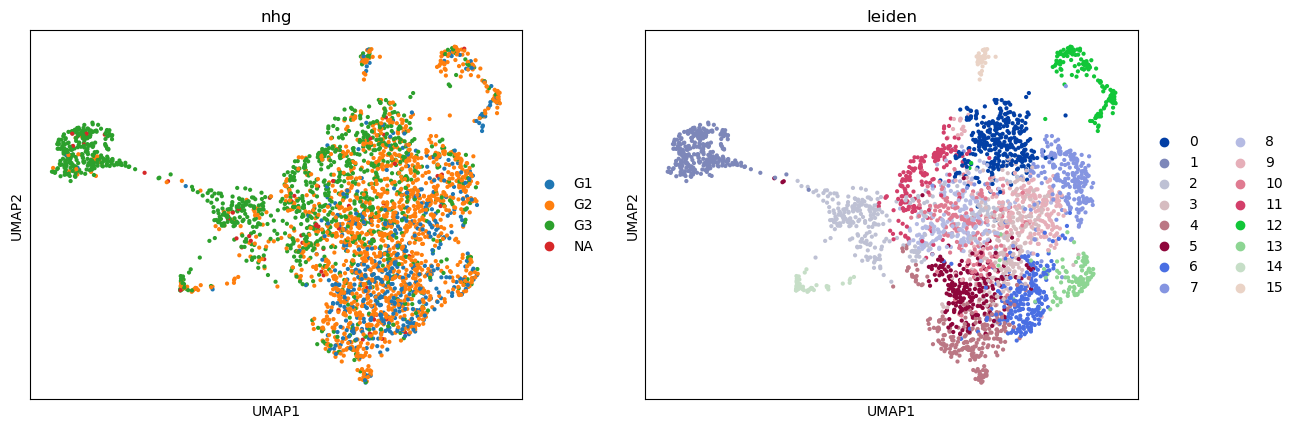

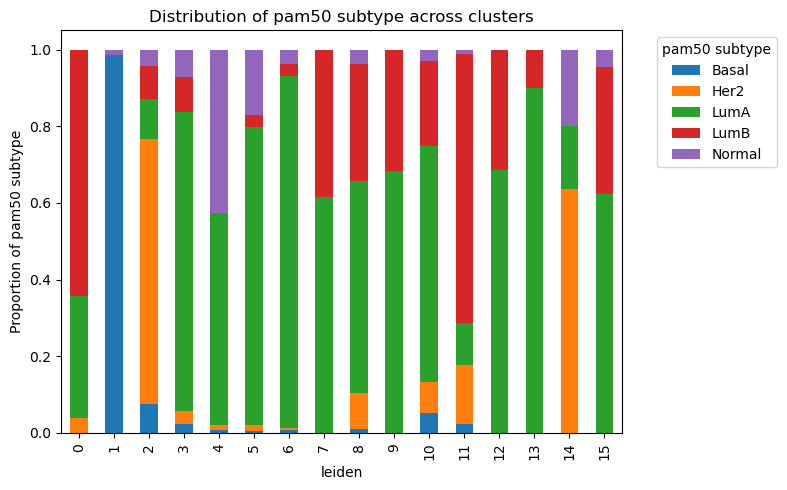

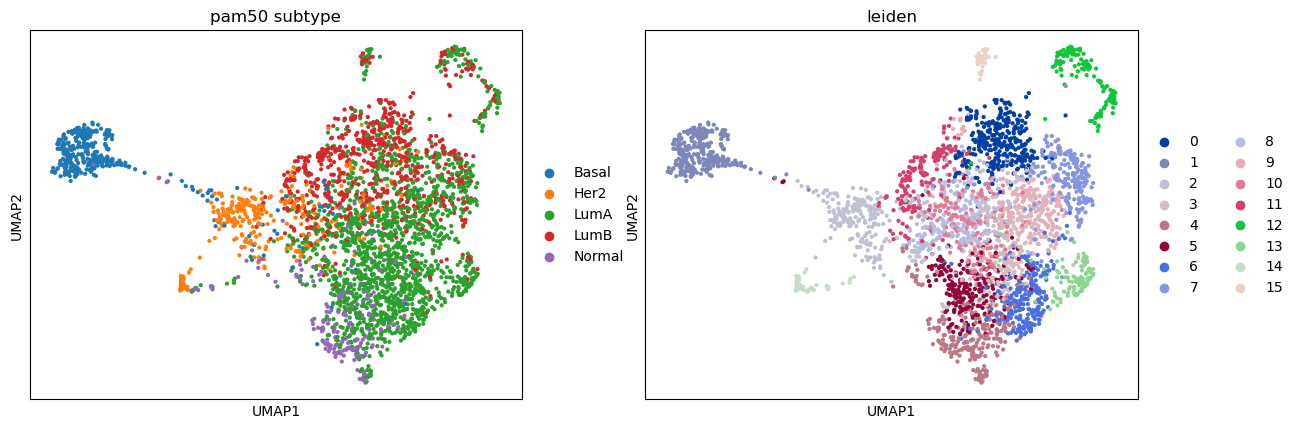

In [273]:
cat_vars=['er status',
       'pgr status', 'her2 status', 'ki67 status', 'nhg','pam50 subtype']
for cat in cat_vars:
    plot_categorical_var(cat)

In [274]:
dict_clusters={
    0:'Luminal B-aggressive',
    1:'Triple Negative-aggressive',
    2:'HER2-aggressive',
    3:'Luminal A-intermediate',
    4:'Normal-intermediate',
    5:'Luminal A-intermediate',
    6:'Luminal A-intermediate',
    7:'Luminal A-intermediate',
    8:'Luminal A-aggressive',
    9:'Luminal A-intermediate',
    10:'Luminal A-aggressive',
    11:'Luminal B-aggressive',
    12:'Luminal A-intermediate',
    13:'Luminal A-intermediate',
    14:'Triple Negative-intermediate',
    15:'Luminal A-intermediate'
}
adata.obs['cluster_names']=adata.obs['leiden'].astype(int).replace(dict_clusters)

In [275]:
dict_clusters={
    0:'aggressive',
    1:'aggressive',
    2:'aggressive',
    3:'intermediate',
    4:'intermediate',
    5:'intermediate',
    6:'intermediate',
    7:'intermediate',
    8:'aggressive',
    9:'intermediate',
    10:'aggressive',
    11:'aggressive',
    12:'intermediate',
    13:'intermediate',
    14:'intermediate',
    15:'intermediate'
}
adata.obs['grade']=adata.obs['leiden'].astype(int).replace(dict_clusters)

In [276]:
dict_clusters={
    0:'Luminal B',
    1:'Triple Negative',
    2:'HER2',
    3:'Luminal A',
    4:'Normal',
    5:'Luminal A',
    6:'Luminal A',
    7:'Luminal A',
    8:'Luminal A',
    9:'Luminal A',
    10:'Luminal A',
    11:'Luminal B',
    12:'Luminal A',
    13:'Luminal A',
    14:'Triple Negative',
    15:'Luminal A'
}
adata.obs['classification']=adata.obs['leiden'].astype(int).replace(dict_clusters)

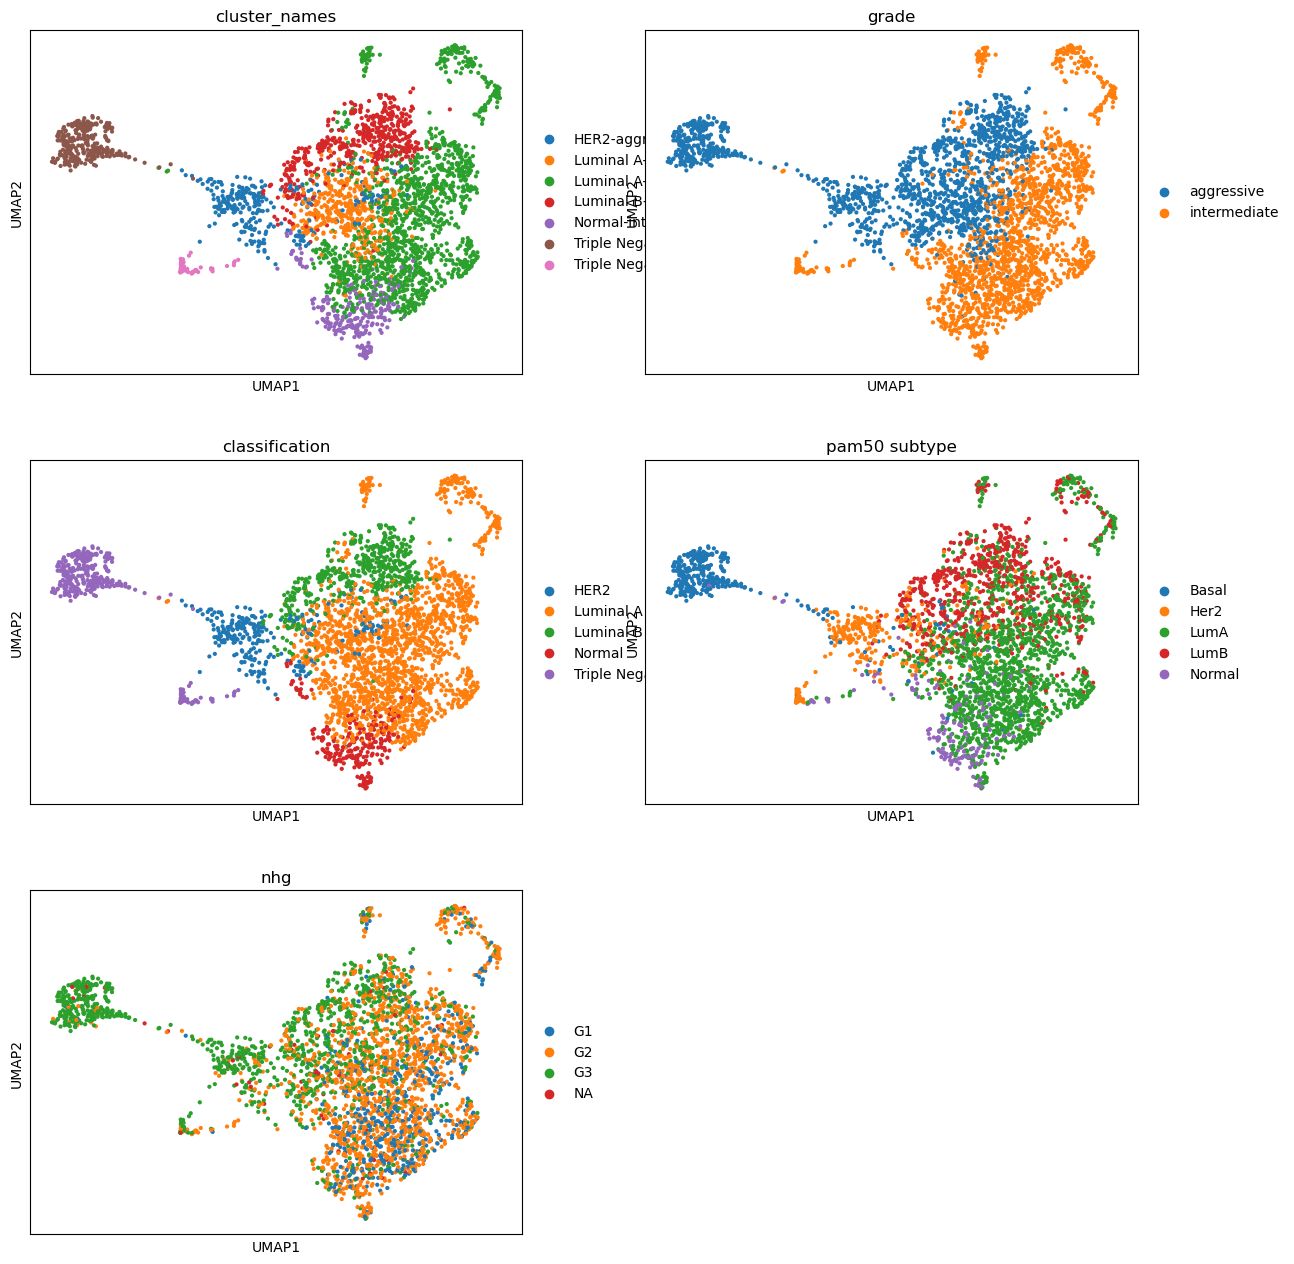

In [277]:
sc.pl.umap(adata,color=['cluster_names','grade','classification','pam50 subtype','nhg'],ncols=2)

In [278]:
adata.write('Data/dataset_annotated.h5ad')

In [217]:
sc.tl.rank_genes_groups(adata, groupby='classification', method='wilcoxon')

/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


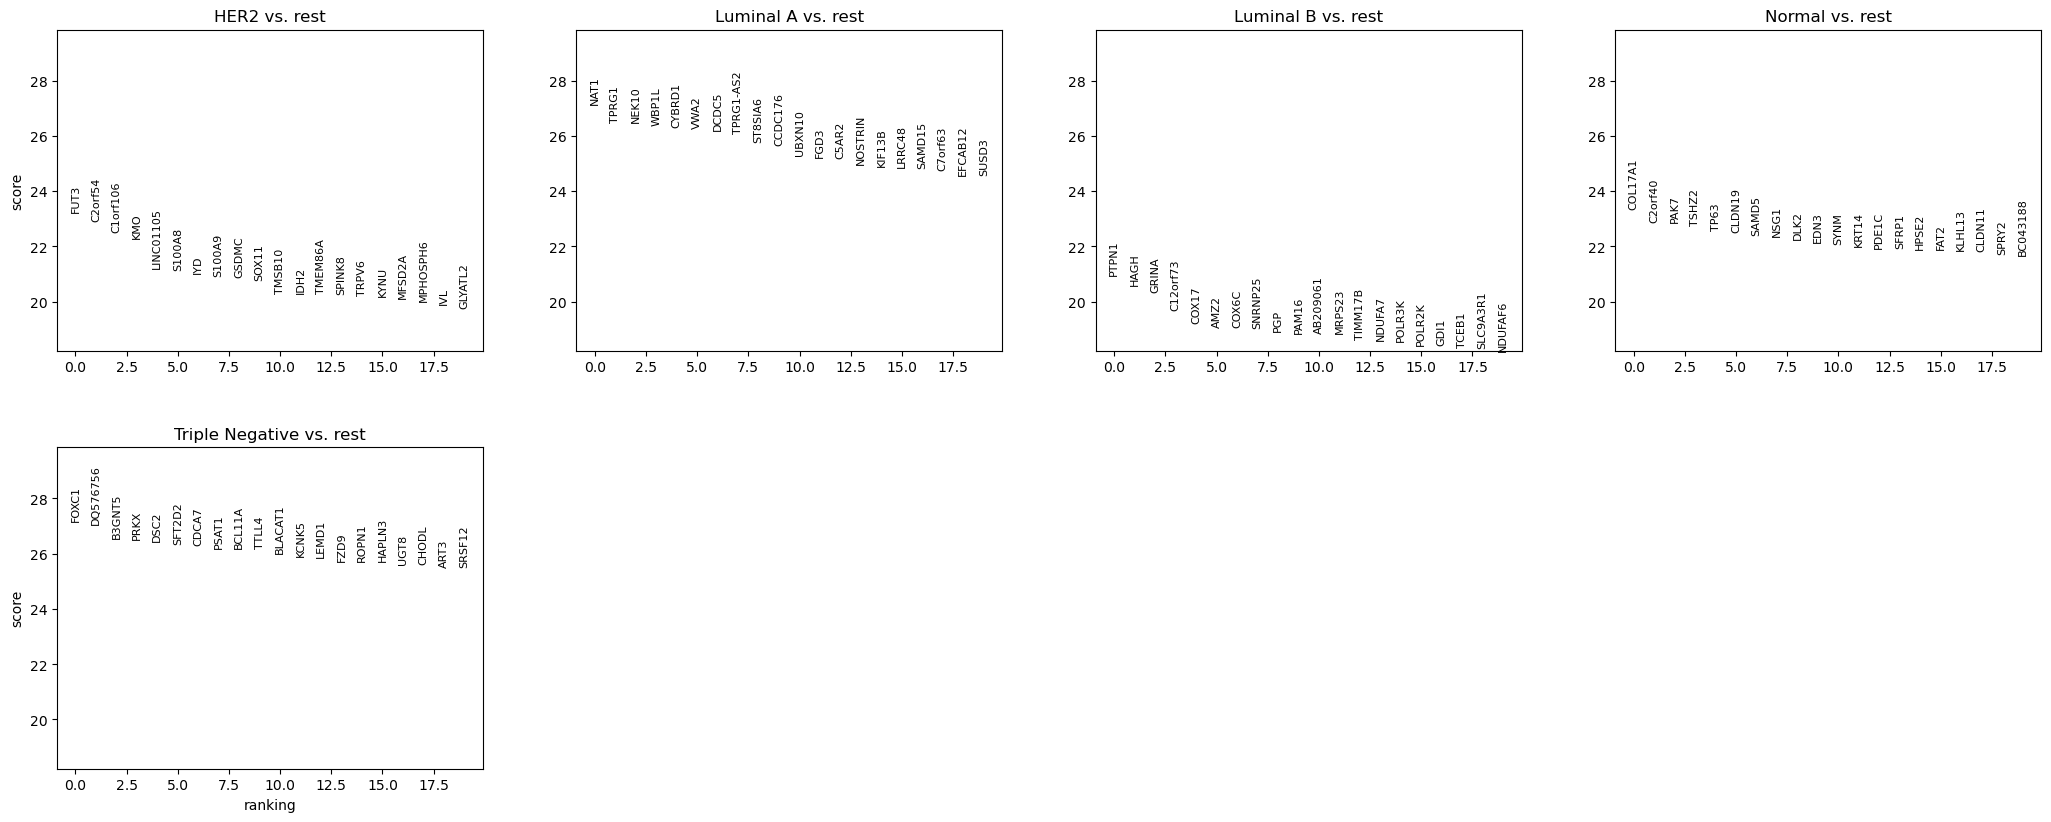

In [218]:
sc.tl.dendrogram(adata,groupby='classification')
sc.pl.rank_genes_groups(adata, groupby='classification')

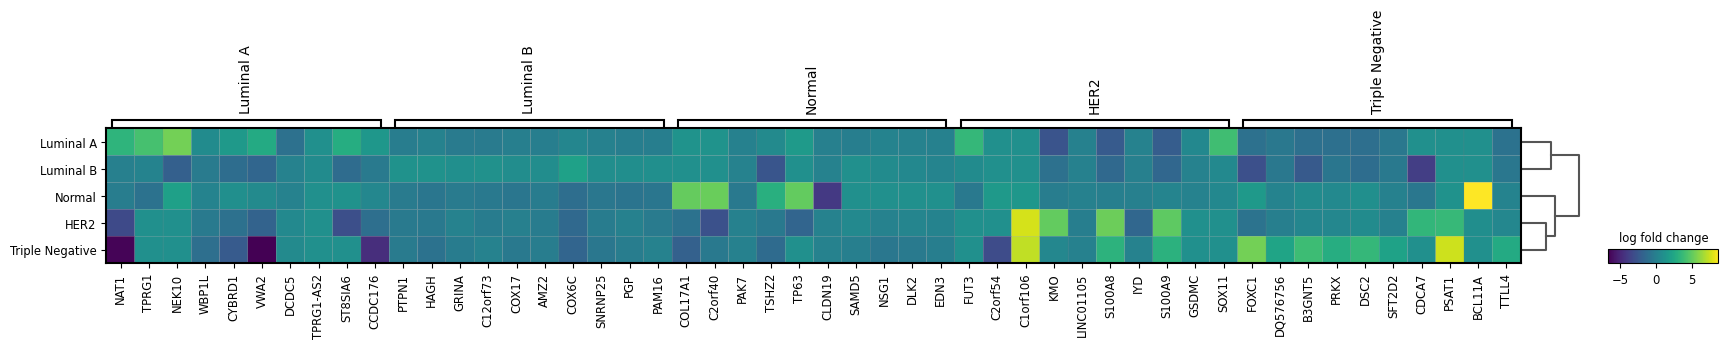

In [219]:
sc.pl.rank_genes_groups_matrixplot(adata, groupby='classification',values_to_plot='logfoldchanges')

In [220]:
sc.tl.rank_genes_groups(adata, groupby='grade', method='wilcoxon')

/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


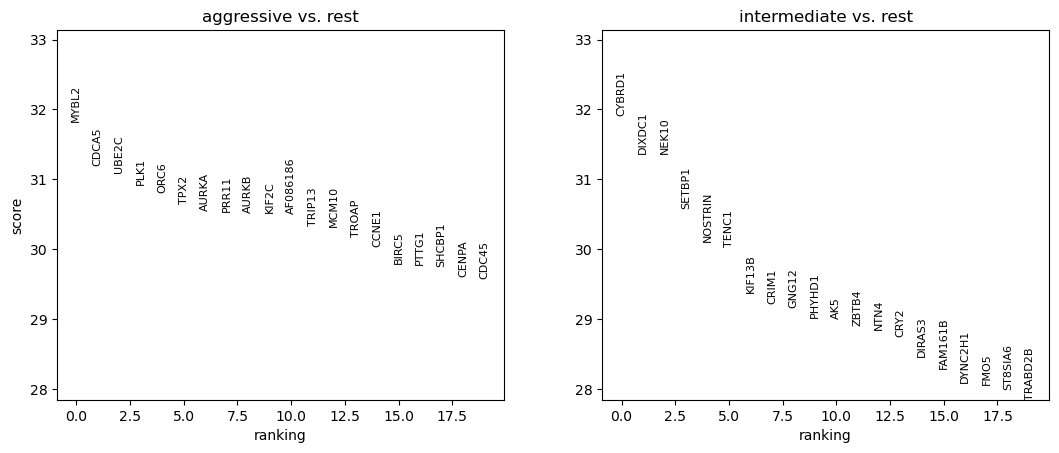

In [221]:
sc.tl.dendrogram(adata,groupby='grade')
sc.pl.rank_genes_groups(adata, groupby='grade')

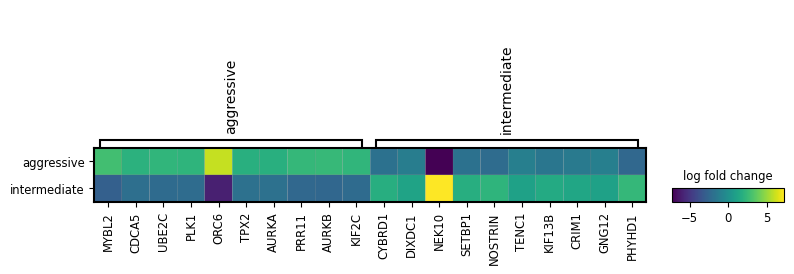

In [222]:
sc.pl.rank_genes_groups_matrixplot(adata, groupby='grade',values_to_plot='logfoldchanges')

In [223]:
sc.tl.rank_genes_groups(adata, groupby='cluster_names', method='wilcoxon')

/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/conda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:455: 

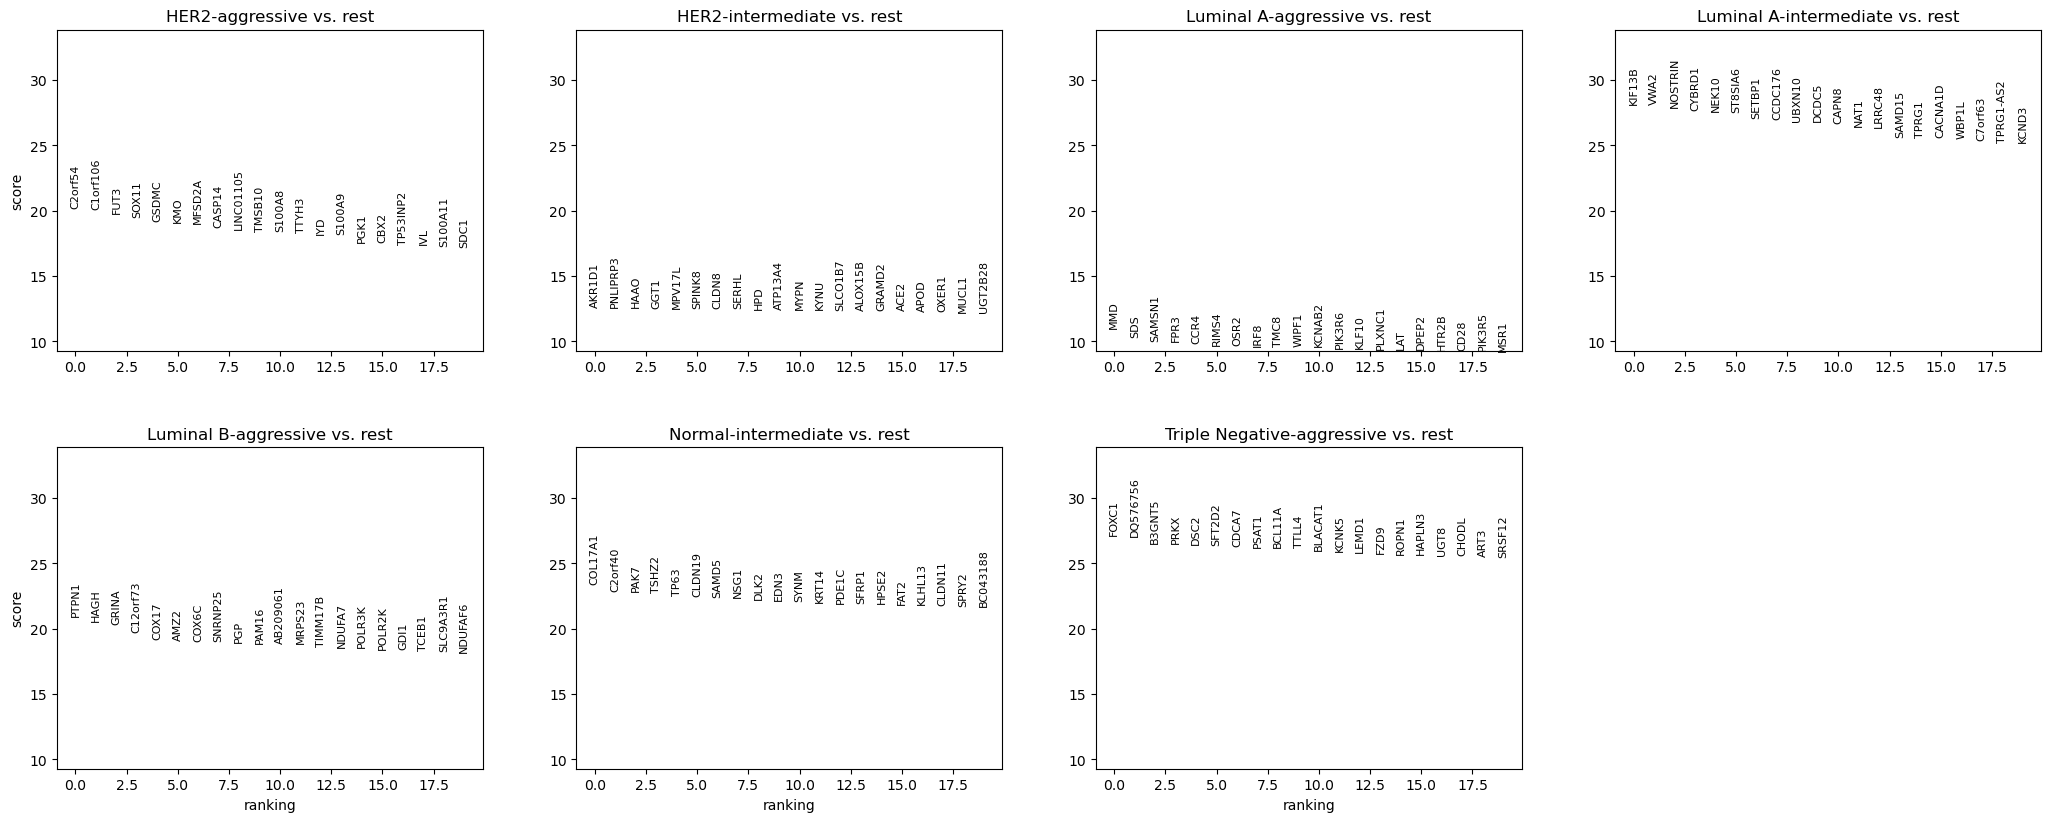

In [224]:
sc.tl.dendrogram(adata,groupby='cluster_names')
sc.pl.rank_genes_groups(adata, groupby='cluster_names')

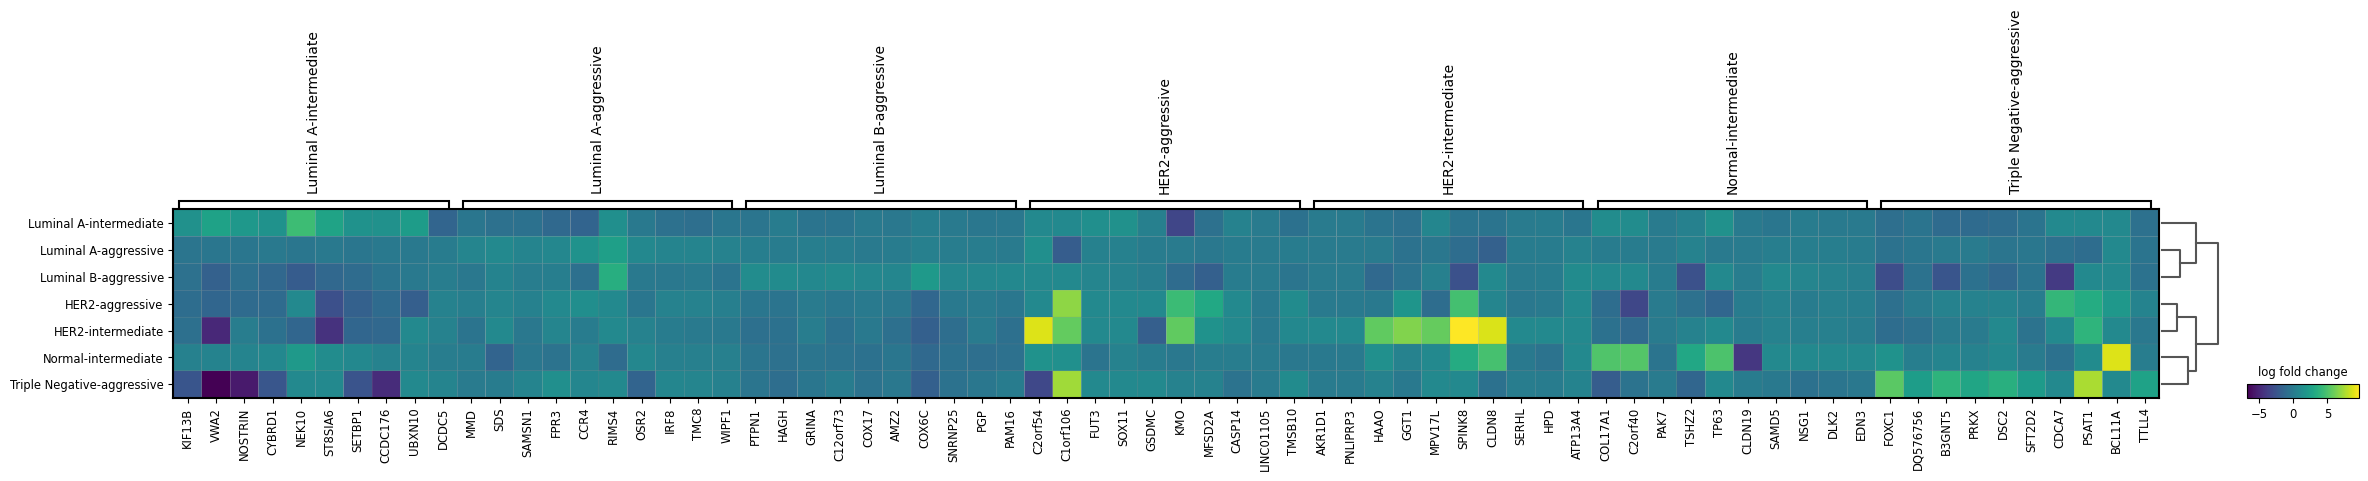

In [225]:
sc.pl.rank_genes_groups_matrixplot(adata, groupby='cluster_names',values_to_plot='logfoldchanges')

In [147]:
import scipy.stats as stats

def plot_continuous_var(variable):
    cluster_key = 'leiden'
    adata.obs[variable] = pd.to_numeric(adata.obs[variable], errors='coerce')

    # Group values by cluster
    groups = [adata.obs[variable][adata.obs[cluster_key] == c] for c in adata.obs[cluster_key].unique()]
    
    # Kruskal-Wallis test (non-parametric ANOVA)
    stat, p = stats.kruskal(*groups)
    print(f"Kruskal-Wallis p-value for {variable} ~ cluster: {p}")
    
    # Plot
    sns.barplot(x=adata.obs[cluster_key], y=adata.obs[variable])
    plt.title(f'{variable} distribution across clusters')
    plt.show()

    sc.pl.umap(adata,color=[variable,cluster_key])

Kruskal-Wallis p-value for age at diagnosis ~ cluster: 2.060320983933288e-59


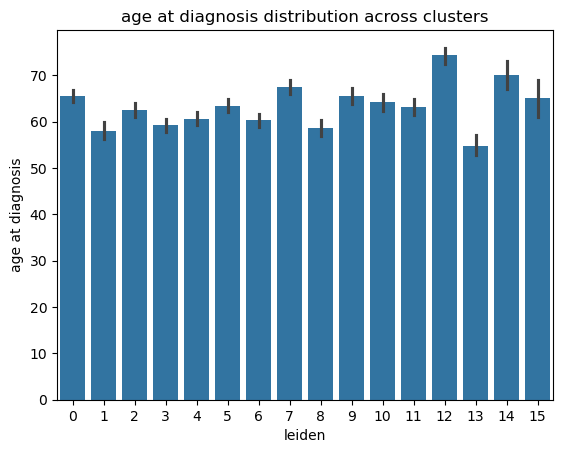

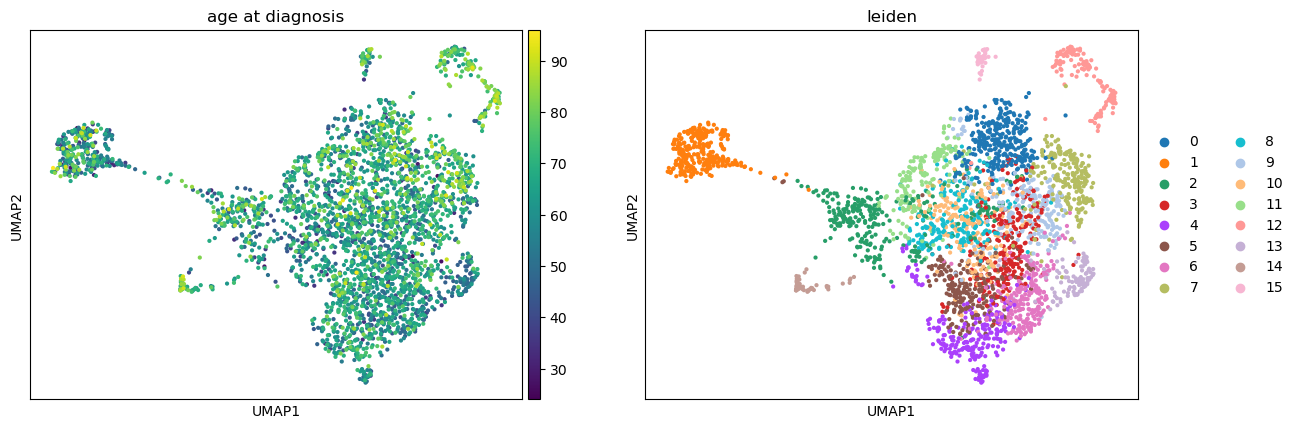

Kruskal-Wallis p-value for tumor size ~ cluster: nan


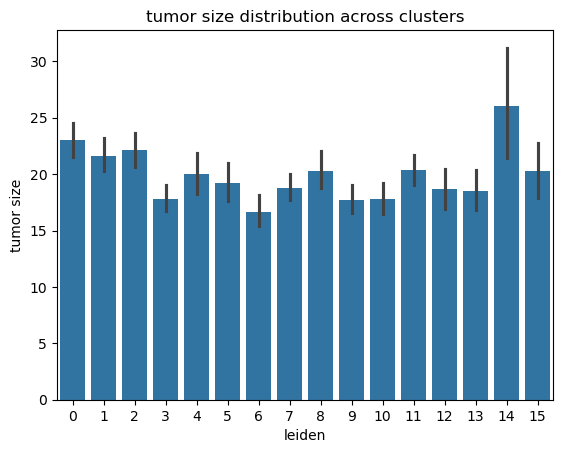

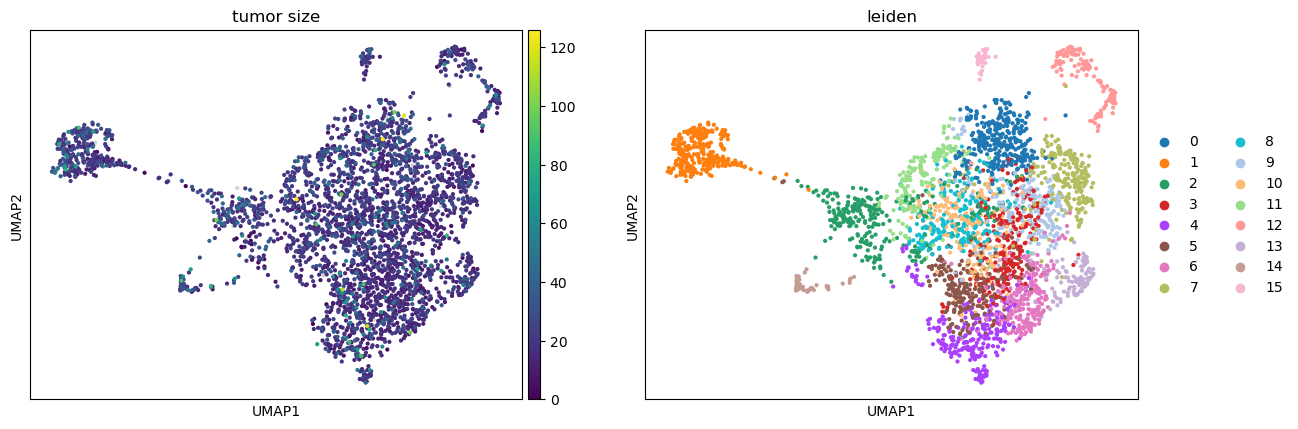

Kruskal-Wallis p-value for overall survival days ~ cluster: 6.063298553846346e-09


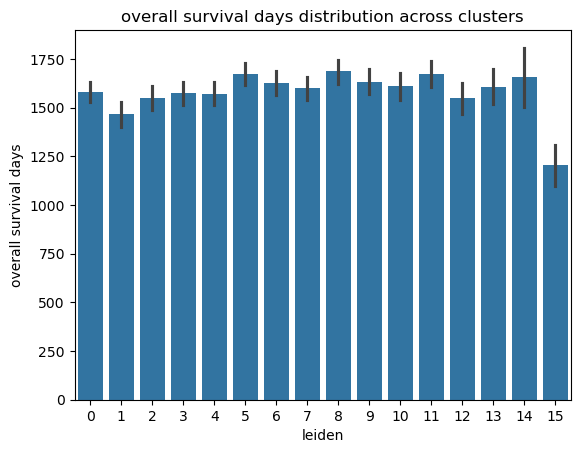

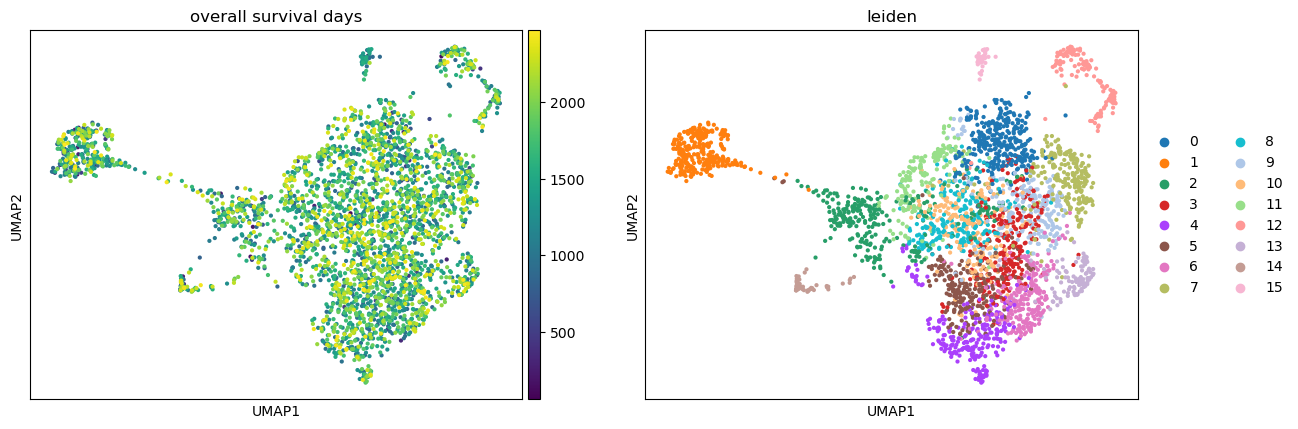

Kruskal-Wallis p-value for overall survival event ~ cluster: 8.591753371925125e-15


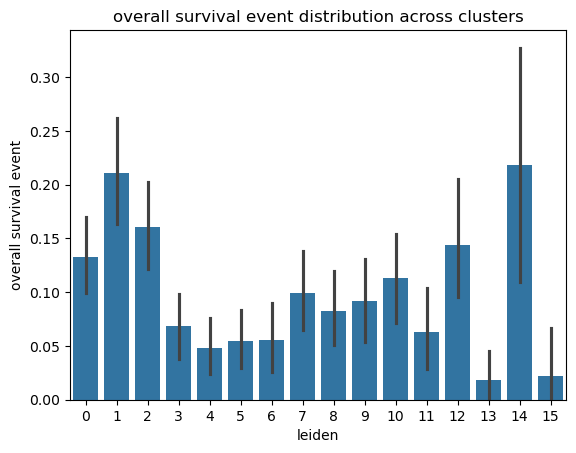

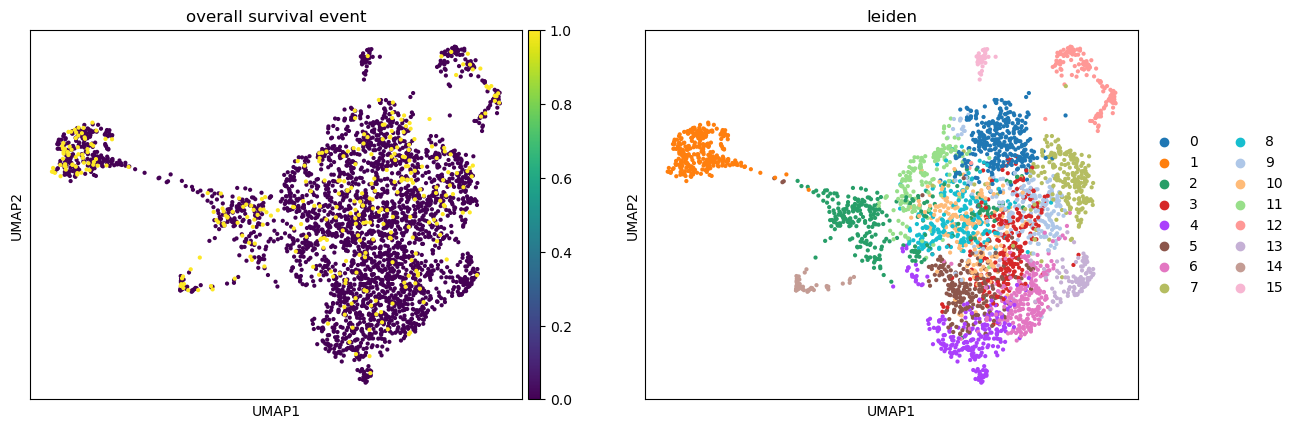

In [148]:
con_vars = ['age at diagnosis', 'tumor size', 'overall survival days', 'overall survival event']
for con in con_vars:
    plot_continuous_var(con)

In [227]:
adata.obs['overall survival event']

Sample
F7       0
F8       0
F142     0
F185     0
F219     0
        ..
F3267    0
F3268    0
F3269    0
F3270    0
F3272    0
Name: overall survival event, Length: 3273, dtype: category
Categories (2, object): ['0', '1']

In [229]:
from lifelines import KaplanMeierFitter

/opt/conda/lib/python3.10/site-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<Axes: xlabel='timeline'>

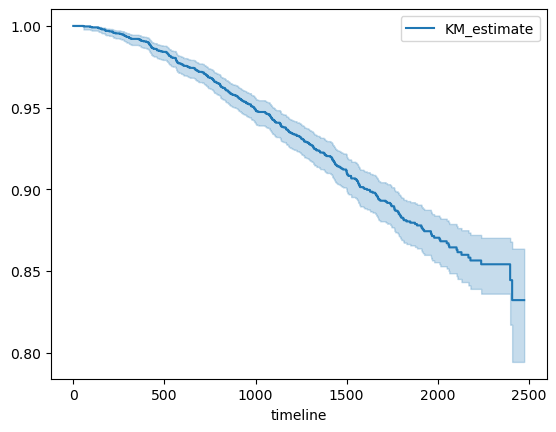

In [230]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=adata.obs['overall survival days'],
        event_observed=adata.obs['overall survival event'])

kmf.plot_survival_function()
